# Infer Volume Tracks

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('DS_2_train.csv', index_col=0)
df_test = pd.read_csv('DS_2_test.csv', index_col=0)

/opt/conda/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
zl = np.unique(df['Z'])
zmin = np.min(zl)
zmax = np.max(zl)
dz = np.diff(zl)[0]

In [8]:
def dmin(v, vl):
    return np.min(np.sum((v.values - vl)**2, axis=1))
def ddmin_f(efr, df):
    z0 = efr.iloc[0]['Z']
    if z0 == zmax:
        efr['dfore'] = 1e6
    else:
        eto = df.query("Z=={}".format(z0 + dz))
        gfr = efr[["X1", "Y1", "X2", "Y2"]]
        gto = eto[["X", "Y", "X1", "Y1"]]
        d = gfr.apply(dmin, axis=1, args=(gto.values,))
        efr['dfore'] = d
    return efr
def ddmin_b(eto, df):
    z0 = eto.iloc[0]['Z']
    if z0 == zmin:
        eto['dback'] = 1e6
    else:
        efr = df.query("Z=={}".format(z0 - dz))
        if len(efr):
            gfr = efr[["X1", "Y1", "X2", "Y2"]]
            gto = eto[["X", "Y", "X1", "Y1"]]
            d = gto.apply(dmin, axis=1, args=(gfr.values,))
            eto['dback'] = d
        else:
            eto['dback'] = 1e6
    return eto
def ddmin(ev, df):
    return ddmin_b(ddmin_f(ev, df), df)
def features(df):
    dx = df['TX'] * dz
    dy = df['TY'] * dz
    df['X1'] = df['X'] + dx
    df['Y1'] = df['Y'] + dy
    df['X2'] = df['X1'] + dx
    df['Y2'] = df['Y1'] + dy
    return df.groupby("Z").apply(ddmin, df)

In [9]:
df0 = df.query("brick_number==57 & signal==1"); print(df0.head())

       event_id             X             Y        Z        TX        TY  \
index                                                                      
2251       7308  40148.816406  40296.425781  21981.0  0.121661  0.069350   
10872     33949  52858.035156  62994.929688  58185.0  0.144345  0.069620   
16194      2648  58015.710938  31991.285156  49134.0  0.363230  0.517732   
28245      7308  42381.359375  41572.296875  43962.0  0.115369  0.046661   
28485      7308  40752.535156  41197.570312  29739.0  0.505339  0.315109   

           chi2  signal  brick_number  
index                                  
2251   0.570107     1.0            57  
10872  1.096898     1.0            57  
16194  0.738304     1.0            57  
28245  0.659886     1.0            57  
28485  0.881151     1.0            57  


In [10]:
xdf0 = features(df0)

/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [11]:
xdf0

,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number,X1,Y1,X2,Y2,dfore,dback
index,,,,,,,,,,,,,,,
2251,7308,40148.816406,40296.425781,21981.0,0.121661,0.069350,0.570107,1.0,57,40306.124195,40386.095182,40463.431983,40475.764584,1.835079e+02,1.337471e+02
10872,33949,52858.035156,62994.929688,58185.0,0.144345,0.069620,1.096898,1.0,57,53044.673550,63084.947835,53231.311944,63174.965982,8.401435e+05,8.724684e+04
16194,2648,58015.710938,31991.285156,49134.0,0.363230,0.517732,0.738304,1.0,57,58485.367469,32660.712124,58955.024000,33330.139092,3.815526e+04,1.280578e+05
28245,7308,42381.359375,41572.296875,43962.0,0.115369,0.046661,0.659886,1.0,57,42530.531790,41632.629660,42679.704205,41692.962444,4.937889e+03,9.515083e+02
28485,7308,40752.535156,41197.570312,29739.0,0.505339,0.315109,0.881151,1.0,57,41405.937901,41605.005999,42059.340646,42012.441685,4.582468e+05,3.946895e+05
45647,7308,41800.406250,41152.601562,34911.0,0.156004,-0.001967,1.105863,1.0,57,42002.118820,41150.058133,42203.831391,41147.514704,1.505555e+04,1.346274e+04
56160,7308,43230.101562,44424.304688,60771.0,0.145010,0.058445,2.845109,1.0,57,43417.599794,44499.873994,43605.098025,44575.443301,9.286696e+04,4.547811e+06
60301,2648,41156.507812,17740.398438,14223.0,0.284868,0.066360,0.253222,1.0,57,41524.842062,17826.201586,41893.176311,17912.004734,2.591653e+04,2.298377e+04
63666,2648,48749.269531,23614.716797,36204.0,-0.111575,0.373079,0.253676,1.0,57,48605.003586,24097.108486,48460.737641,24579.500175,8.219657e+05,3.121284e+05


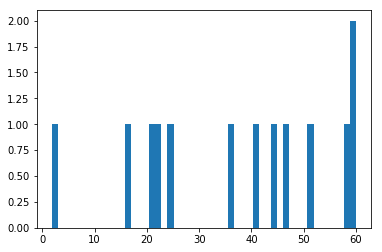

In [25]:
fore = xdf0['dfore'].values
plt.hist(fore[fore < np.percentile(fore, 1)], bins=50); plt.show()

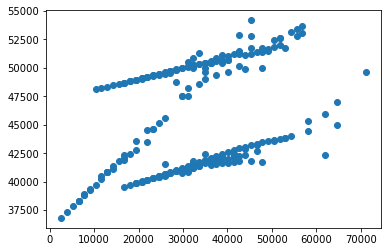

In [82]:
xdf1 = xdf0.iloc[fore < np.percentile(fore,20)]
plt.scatter(xdf1.Z, xdf1.X); plt.show()